In [5]:
#import api key from env
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.environ.get("OPENAI_API_KEY")


In [6]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [7]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]

In [8]:
#select 1 from 4
prompt = "There is 4 types of vegetables in a cafeteria. Pick one of them."
#revised_prompt="During the lunch break, You go to the cafeteria in the college. In the cafeteria, there are four different vegetable options available. You select one from the following list based on your preference. You call only it's number.Be mindful of not being biased by cognitive bias."
revised_prompt="During a lunch break, find yourself in the college cafeteria. There, you'll see four distinct vegetable options to choose from. Your task is to select one, referring to it only by its number.\n\
When responding, please consider each option independently to ensure your selection is based solely on your preference."
# Please ensure your choice is made independently and not influenced by any pre-existing preferences or biases.

In [10]:

choice_1 = "(1): Dynamite chili and tangy lime-seasoned beets\n\
            (2): Beets\n\
            (3): Lighter-choice beets with no added sugar\n\
            (4): High-antioxidant beets"

choice_2 = "(1): Beets\n\
            (2): Dynamite chili and tangy lime-seasoned beets\n\
            (3): Lighter-choice beets with no added sugar\n\
            (4): High-antioxidant beets"


choice_3 = "(1): High-antioxidant beets\n\
            (2): Beets\n\
            (3): Lighter-choice beets with no added sugar\n\
            (4): Dynamite chili and tangy lime-seasoned beets"

In [11]:
a = ""

prompt_1 = f"Rewrite the following prompt such that a reviewer would not be biased by cognitive bias. \n\
            [start of prompt]{a}[end of prompt]\n\
            Start your answer with [start of revised prompt]"

In [12]:
#generate completion

import openai
openai.api_key = API_KEY
def generate_completion(role, choice, prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.7,
        max_tokens=100,
        )
    return response

In [119]:
question = "Currently, the method used to compare the four labels is to present four labels and prompt the participants to choose one of them. In the original paper, however, the labels were compared by placing different labels on vegetables in a buffet-style cafeteria every day.How can this be replicated with a prompt?Let'S think step by step"
response = generate_completion("you are wise assistant",question,"")
print(response.choices[0].message.content)

To replicate the method of comparing labels from the original study using a prompt-based approach, we need to design a step-by-step process that simulates the conditions and choices similar to those in a buffet-style cafeteria setting. Here’s how you can approach this:

### Step 1: Define the Objective
Clarify what you want to measure or compare with the labels. In the original study, it might have been the impact of labels on the choice or consumption of vegetables.

### Step 2: Design Labels
Create the four different labels that you want to test. Ensure these labels are distinct and relevant to the choices being made, similar to how they would be used in a cafeteria setting (e.g., "Low-Fat," "Heart-Healthy," "Reduces Cancer Risk," "No Added Sugar").

### Step 3: Create a Virtual Scenario
Develop a virtual buffet scenario where participants can imagine they are choosing their meals. Describe the setting in detail:
- **Location:** A cafeteria with a buffet line.
- **Scenario:** Partici

In [13]:
import re
def ask_vegetable_preference(attribute,choice,prompt,range_number):
    df = pd.DataFrame(columns=["attribute","response","number"])
    
    for i in range(range_number):
        attribute = "college student"
        #attribute = random.choice(attribute_list)
        #sex = random.choice(sex_list)
        #fisique = random.choice(fisique_list)

        role = f"you are {attribute}."
        #you have to behave like {attribute}."

        response = generate_completion(role, choice, prompt)
        content = response.choices[0].message.content

        #extract number from responce
        numbers = re.findall(r'\d+', content)
        vegetable_number = int(numbers[0]) if numbers else None
        df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_number},index=[0])

        df = pd.concat([df,df_sample],ignore_index=True)
    return df

In [14]:
df_1 = ask_vegetable_preference("college student",choice_1,prompt,10)

df_1.head(10)

,attribute,response,number
0,college student,I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. That sounds like it has a nice kick and some interesting flavors!,1
1,college student,"It sounds like you have a variety of beet options! If I were to pick one based on health and flavor, I'd go with option (1): Dynamite chili and tangy lime-seasoned beets. This choice seems like it would have a nice balance of spice and tanginess, making it a flavorful addition to any meal!",1
2,college student,I would pick option (1): Dynamite chili and tangy lime-seasoned beets. This option seems flavorful and would add a nice kick to the meal with the chili and lime seasoning.,1
3,college student,I would go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a flavorful twist and would be a delicious way to enjoy beets!,1
4,college student,I'd go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like a flavorful and exciting choice!,1
5,college student,I would pick option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like a flavorful and exciting choice!,1
6,college student,I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has an interesting and flavorful twist!,1
7,college student,I'd go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds flavorful and gives a nice twist to regular beets!,1
8,college student,"It looks like you have a variety of beet options! If you're looking for something flavorful and with a bit of a kick, option (1) Dynamite chili and tangy lime-seasoned beets sounds exciting. If you prefer something simpler or are looking to avoid additional seasonings, then option (2) Beets would be a straightforward choice. For a healthier option with less sugar, option (3) Lighter-choice beets with no added sugar would be ideal. And if you're",1
9,college student,I would pick option 4: High-antioxidant beets. This option seems health-conscious and provides a good source of nutrients.,4


In [125]:
import pandas as pd
import random
import re

df_1 = pd.DataFrame()

for i in range(50):
    attribute = "college student"
    #attribute = random.choice(attribute_list)
    #sex = random.choice(sex_list)
    #fisique = random.choice(fisique_list)

    role = f"you are {attribute}.you have to behave like {attribute}."


    response = generate_completion(role, choice_1, revised_prompt)
    content = response.choices[0].message.content

    #extract number from responce
    numbers = re.findall(r'\d+', content)
    vegetable_number = int(numbers[0]) if numbers else None
    df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_number},index=[0])

    df_1 = pd.concat([df_1,df_sample],ignore_index=True)

df_1.head(50)

,attribute,response,number
0,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds flavorful and a bit different from the usual!,1
1,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. I'm in the mood for something with a bit of a kick, and the lime seasoning sounds refreshing!",1
2,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. That sounds like it has a lot of flavor and a nice kick to it!,1
3,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor, and I'm in the mood for something a bit different today!",1
4,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. Sounds like it has a lot of flavors, which I usually like in my meals!",1
5,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which I really like!",1
6,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor, and I love a little kick in my food!",1
7,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which I usually like in my meals!",1
8,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. I like a bit of spice and flavor in my meals, and that sounds like it would be the most interesting option from the list!",1
9,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. The added flavors sound really appealing!,1


In [126]:
import pandas as pd
import random
import re

df_2 = pd.DataFrame()

for i in range(50):
    #attribute = random.choice(attribute_list)
    #sex = random.choice(sex_list)
    #fisique = random.choice(fisique_list)
    attribute = "college student"

    role = f"you are {attribute}.you have to behave like {attribute}."


    response = generate_completion(role, choice_2, revised_prompt)
    content = response.choices[0].message.content

    #extract number from responce
    numbers = re.findall(r'\d+', content)
    vegetable_number = int(numbers[0]) if numbers else None
    df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_number},index=[0])

    df_2 = pd.concat([df_2,df_sample],ignore_index=True)

df_2.head(50)

,attribute,response,number
0,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. That sounds like it has a lot of flavor and a nice kick to it!,2
1,college student,"I think I'll go with option (2), the dynamite chili and tangy lime-seasoned beets. They sound like they have a nice kick to them with a bit of zest, which is perfect to shake up the usual lunch routine!",2
2,college student,"Out of these options, I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a nice kick and some extra flavor!",2
3,college student,"I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. They sound like they have a lot of flavors, which I'm in the mood for today!",2
4,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. I like the sound of that flavor combination; it seems like it would be really tasty and a bit different from the usual!,2
5,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. The combination of chili and lime sounds really flavorful and exciting!,2
6,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. They sound like they have a nice kick to them!,2
7,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. They sound like they have a nice kick to them and a bit of extra flavor!,2
8,college student,"I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. I like a bit of spice and flavor in my food, and this sounds really good!",2
9,college student,"I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which I really like!",2


In [115]:
import pandas as pd
import random
import re

df_3 = pd.DataFrame()

for i in range(50):
    #attribute = random.choice(attribute_list)
    #sex = random.choice(sex_list)
    #fisique = random.choice(fisique_list)
    attribute = "college student"

    role = f"you are {attribute}.you have to behave like {attribute}."


    response = generate_completion(role, choice_3, revised_prompt)
    content = response.choices[0].message.content

    #extract number from responce
    numbers = re.findall(r'\d+', content)
    vegetable_number = int(numbers[0]) if numbers else None
    df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_number},index=[0])

    df_3 = pd.concat([df_3,df_sample],ignore_index=True)

df_3.head(50)

,attribute,response,number
0,college student,"I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor, which I prefer in my food to keep things interesting!",4
1,college student,I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. The additional flavors of chili and lime sound like a great way to spice up the meal and make it more exciting!,4
2,college student,"I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which could be a nice change from the usual cafeteria food!",4
3,college student,"Option (4), the dynamite chili and tangy lime-seasoned beets, sounds interesting and flavorful. I think I'll go with that one! The combination of chili and lime seems like it would add a nice kick and make the beets more exciting to eat.",4
4,college student,"Given the options, I think I'll go with number 4: the dynamite chili and tangy lime-seasoned beets. It sounds like it has a flavorful kick to it, which I really enjoy in a meal!",4
5,college student,"I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a really interesting flavor profile, and I'm in the mood for something with a bit of a kick today!",4
6,college student,"I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor, which would really spice up my lunch!",4
7,college student,"I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. The combination of chili and lime sounds really flavorful, and it seems like it would add a nice kick to the meal. Plus, it's a bit more exciting than the standard options.",4
8,college student,I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. The added flavors of chili and lime sound really appealing and different from the usual way beets are prepared. It seems like a tasty way to spice up a meal!,4
9,college student,"I think I'll go with option (4): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor, which is perfect for spicing up a typical lunch!",4


attribute
College teacher     19
Graduate student    18
College student     13
Name: count, dtype: int64 attribute
Graduate student    18
College student     17
College teacher     15
Name: count, dtype: int64


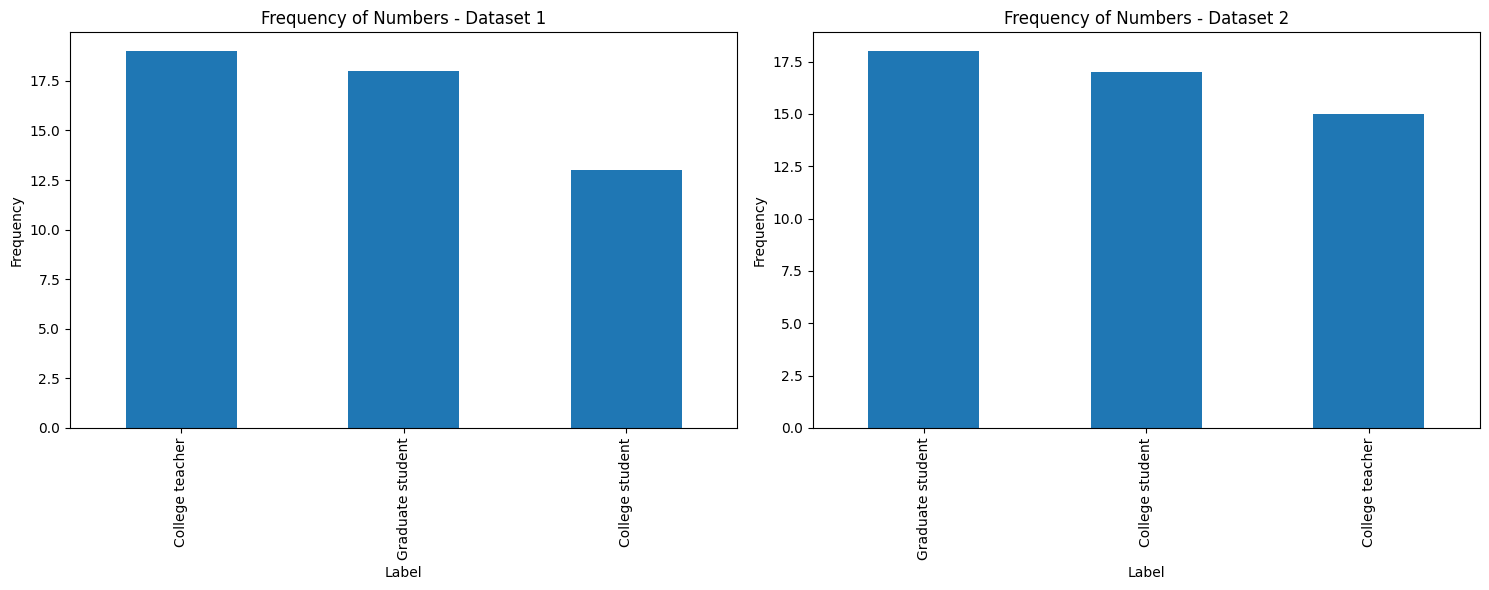

In [46]:
#draw graph
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each number
frequency_1 = df_1['attribute'].value_counts()
frequency_2 = df_2['attribute'].value_counts()
print(frequency_1,frequency_2)
# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first bar plot
frequency_1.plot(kind='bar', ax=ax1)
ax1.set_title('Frequency of Numbers - Dataset 1')
ax1.set_xlabel('Label')
ax1.set_ylabel('Frequency')


# Plot the second bar plot
frequency_2.plot(kind='bar', ax=ax2)
ax2.set_title('Frequency of Numbers - Dataset 2')
ax2.set_xlabel('Label')
ax2.set_ylabel('Frequency')


# Adjust layout to prevent overlapping of plots
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
choice_1_dic = {1:"Dynamite chili and tangy lime-seasoned beets",
            2:"Beets",
            3:"Lighter-choice beets with no added sugar",
            4:"High-antioxidant beets"}
choice_2_dic = {1:"Beets",
            2:"Dynamite chili and tangy lime-seasoned beets",
            3:"Lighter-choice beets with no added sugar",
            4:"High-antioxidant beets"}
frequency_1 = df_1['number'].value_counts()
frequency_1.index = frequency_1.index.map(lambda x: choice_1_dic[x])
frequency_2 = df_2['number'].value_counts()
frequency_2.index = frequency_2.index.map(lambda x: choice_2_dic[x])

desired_order = ["Dynamite chili and tangy lime-seasoned beets",
                 "Beets",
                 "Lighter-choice beets with no added sugar",
                 "High-antioxidant beets"]

# Reorder the index based on the desired order
frequency_1 = frequency_1.reindex(desired_order)
frequency_2 = frequency_2.reindex(desired_order)

print(frequency_1,frequency_2)

number
Dynamite chili and tangy lime-seasoned beets     1
Beets                                            8
Lighter-choice beets with no added sugar        34
High-antioxidant beets                           5
Name: count, dtype: int64 number
Dynamite chili and tangy lime-seasoned beets     1
Beets                                           33
Lighter-choice beets with no added sugar         7
High-antioxidant beets                           9
Name: count, dtype: int64


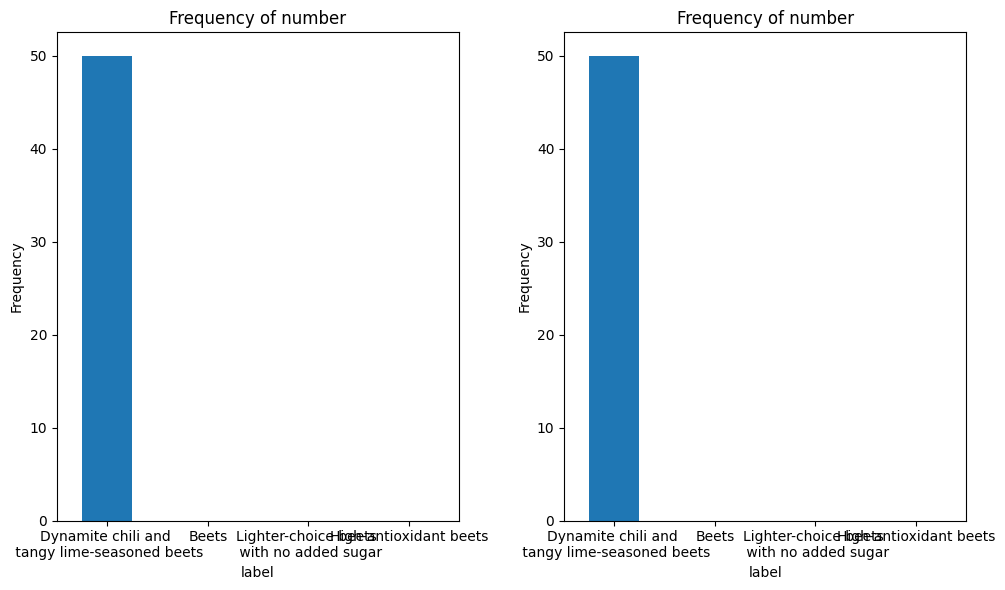

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Define dictionaries to map numeric values to descriptive labels
choice_1_dic = {
    1: "Dynamite chili and \n tangy lime-seasoned beets",
    2: "Beets",
    3: "Lighter-choice beets \n with no added sugar",
    4: "High-antioxidant beets"
}

choice_2_dic = {
    1:"Beets",
    2:"Dynamite chili and \n tangy lime-seasoned beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"High-antioxidant beets"
}


choice_3_dic = {
    1:"Higher-antioxidant beets",
    2:"Beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"Dynamite chili and \n tangy lime-seasoned beets"
}

column = "number"

# Define a function to plot frequency of numbers associated with descriptive labels
def plot_frequency(df,column,choice_dic, ax):
    frequency = df[column].value_counts().sort_index()
    frequency.index = frequency.index.map(lambda x: choice_dic[x])
    desired_order = list(choice_1_dic.values())
    frequency = frequency.reindex(desired_order)
    frequency.plot(kind='bar', ax=ax)
    ax.set_xlabel('label')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {column}')
    ax.tick_params(axis='x', rotation=0)

# Create DataFrame 1 (df_1) and DataFrame 2 (df_2) before calling this function

# Plot frequency for DataFrame 1
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 3, 1)
plot_frequency(df_1, column,choice_1_dic, ax1)

# Plot frequency for DataFrame 2
ax2 = plt.subplot(1, 3, 2)
plot_frequency(df_2, column,choice_2_dic, ax2)

#ax3 = plt.subplot(1, 3, 3)
#plot_frequency(df_3, column,choice_3_dic, ax3)

plt.tight_layout()
plt.show()
